# Chapter 2 - Neural Representation

In [1]:
#Setup the environment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
from nengo.dists import Uniform
from nengo.utils.matplotlib import rasterplot
from nengo.utils.ensemble import tuning_curves

# 2.1 - Representing a scalar

You can construct and manipulate a population of neurons (ensemble) in nengo. This model shows shows how the activity of neural populations can be thought of as representing a mathematical variable (a scalar value).

## Create the Model

This model has paramenters as described in the book and uses a single population (ensemble) of 100 LIF neurons. Note that the default max rates in Nengo 2.0 are (200, 400), so you have to explicitly specify them to be (100, 200) to create the model with the same parameters as described in the book. Moreover the 'Node Factory' feature of ensembles mentioned in the book maps to the 'neuron_type' in Nengo 2.0 which is set to LIF by default. The default values of tauRC, tauRef, radius and intercepts in Nengo 2.0 are the same as those mentioned in the book.

In [2]:
model = nengo.Network(label='Many Neurons')
with model:
    #Input
    input = nengo.Node(lambda t: np.sin(16 * t))      # Input sine wave with range 1
    #input = nengo.Node(lambda t: 4*np.sin(16 * t))   # Input sine wave with range increased to 4
    
    #Ensemble with 100 LIF neurons  
    x = nengo.Ensemble(100, dimensions=1, max_rates = Uniform(100, 200))
    
    #Connecting input to ensemble
    nengo.Connection(input, x) 

## Run the model

Import the nengo_gui visualizer to run and visualize the model.

In [3]:
from nengo_gui.ipython import IPythonViz
IPythonViz(model, "scalars.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs as shown in the figure below.

The graph on the top left shows the input and the graph on the top right shows the the decoded value of the neural spiking (a linearly decoded estimate of the input). The graph on the bottom right shows the spike raster which is the spiking output of the neuron population (x).

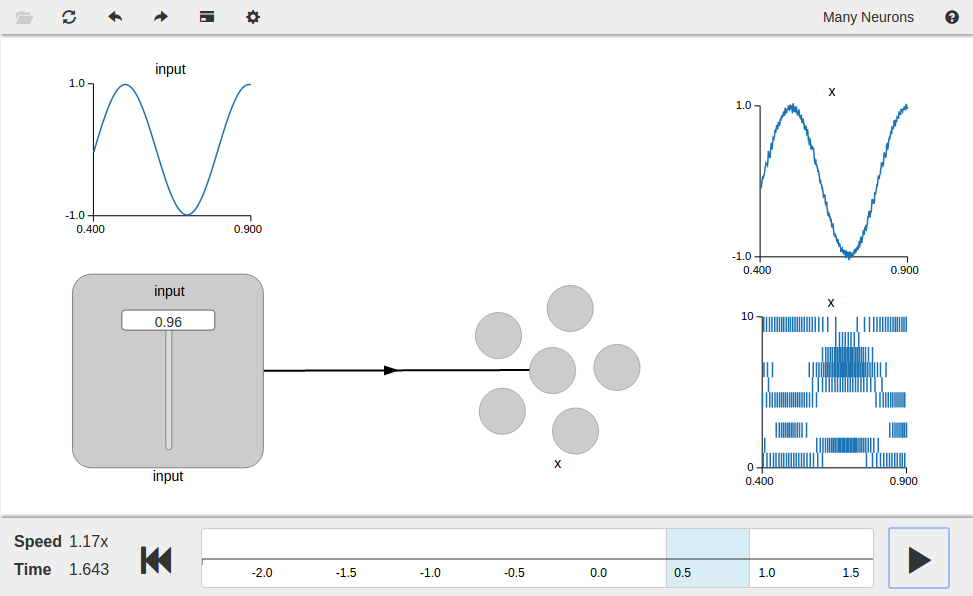

In [4]:
from IPython.display import Image
Image(filename='scalars.png')

### Increasing the range of Input

You have seen that the population of neurons does a reasonably good job of representing the input. However, neurons cannot represent arbitrary values well and you can verify this by increasing the range of the input to 4 ( input = nengo.Node(lambda t: 4*np.sin(16 * t)) ). You will observe the same saturation effects as described in the book, showing that the neurons do a much better job at representing information within the defined radius.

### Plotting the Tuninig Curves

The tuning curve of a neurons tells us how it responds to an incoming input signal. Looking at the tuning curves of the neurons in an ensemble is one of the most common ways to debug failures in a model. 

For a one-dimensional ensemble, since the input is a scalar, we can use the input as x-axis and the neuron response as y-axis.

In [5]:
#Alternative way to run the model
sim = nengo.Simulator(model)   # Create the simulator
sim.run(1)                     # Run the simulation for 1 second

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

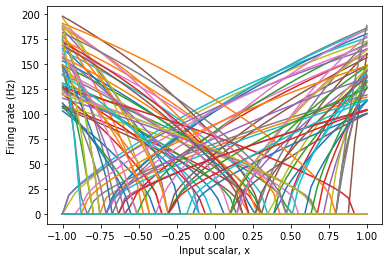

In [6]:
#Plot the tuning curves of the ensemble
plt.figure()
plt.plot(*tuning_curves(x, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x");

If there is some biological or functional reason to impose some pattern to the neuron responses, you can do so by changing the parameters of the ensemble.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

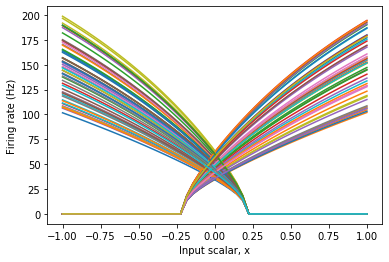

In [7]:
from nengo.dists import Choice
x.intercepts = Choice([-0.2])     # change the intercept of all neurons -0.2
sim = nengo.Simulator(model)

plt.plot(*tuning_curves(x, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x");

Note that in the above figure, some neurons start firing at -0.2, while others stop firing at 0.2. This is because the input signal, x, is multipled by a neuron's encoder when it is converted to input current. You can also constrain the tuning curves by changing the encoders of the ensemble.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

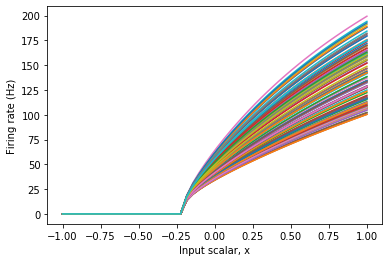

In [8]:
x.encoders = Choice([[1]])      # change the encoder of all neurons to [1]
sim = nengo.Simulator(model)

plt.plot(*tuning_curves(x, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x");

This gives us an ensemble of neurons that respond very predictably to input. In some cases, this is important for the proper functioning of a model, or to match what we know about the physiology of a brain area or neuron type.


# 2.2 - Representing a Vector

In nengo, ensembles of neurons represent information. In this model, you will represent a two-dimensional vector with a single ensemble of LIF (leaky integrate-and-fire) neurons. Though this is a case of two-dimensional vector representation, but the ideas naturally generalize to any dimension.

## Create the Model

This model has paramenters as described in the book, with the neurons in the ensemble having two dimensions. Since the default max rates in Nengo 2.0 are (200, 400), so you have to explicitly specify them to be (100, 200) to create the same model as in the book. The default values of tauRC, tauRef, intercepts, radius and expected noise in Nengo 2.0 are same as those mentioned in the book.

In [9]:
model = nengo.Network(label='2D Representation')
with model:
    #Input Nodes
    sin = nengo.Node(output=np.sin)
    cos = nengo.Node(output=np.cos)
    
    #Ensemble with 100 LIF neurons which represents a 2-dimensional signal
    x = nengo.Ensemble(100, dimensions=2, max_rates=Uniform(100, 200))
    
    #Get the neuron encoders
    encoders = x.encoders.sample(100,2)
    
    #Connecnting input to ensemble
    #The indices in ensemble 'x' define which dimension the input will project to
    nengo.Connection(sin, x[0])
    nengo.Connection(cos, x[1])

## Add Probes to Collect Data

In [10]:
with model:
    sin_probe = nengo.Probe(sin)                   
    cos_probe = nengo.Probe(cos)                   
    x_probe = nengo.Probe(x, synapse=0.01)   # Decoded ouput of the ensemble

## Run the model

Import the nengo_gui visualizer to run and visualize the model.

In [11]:
from nengo_gui.ipython import IPythonViz
IPythonViz(model, "vectors.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs as shown in the figure below.

The `cos` and `sin` graphs show the two dimensional input provided to the ensemble and the top right graph shows the the decoded estimate of this two dimensional input. The graph on bottom right shows the XY-value i.e., the state represented by one dimension of the ensemble vs the state represented by the other dimension. 

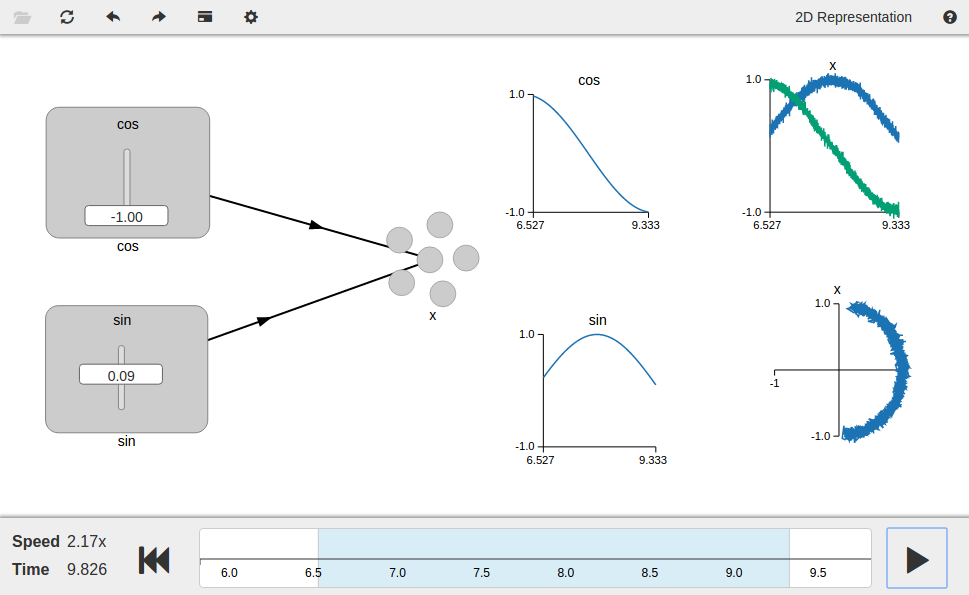

In [12]:
from IPython.display import Image
Image(filename='vectors.png')